In [1]:
# Heat flux Time Series
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
hs = 1
state01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_' + str(format(hs,'03d')) + '.nc')
State = state01.isel(Y=range(30,39), X=range(1,120), Xp1=range(1,121))     
Grid01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/grid_' + str(format(hs,'03d')) + '.nc')
Dif01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/Dif_' + str(format(hs,'03d')) + '.nc')
adv = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/Adv_' + str(format(hs,'03d')) + '.nc')
Grid = Grid01.isel(X=range(120), Xp1=range(1,121), Y=range(30,39))
Adv = adv.isel(X=range(1,120), Y=range(30,39))

Xp = State.Xp1.data

In [3]:
def heatflux_ts(file, xidx):
    Dif01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat_high/Dif_' + str(format(file,'03d')) + '.nc')
    Adv01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat_high/Adv_' + str(format(file,'03d')) + '.nc')
    Dif = Dif01.isel(X=range(1,120), Xp1=range(1,121), Y=range(30,39))
    Adv = Adv01.isel(X=range(1,120), Xp1=range(1,121), Y=range(30,39))
    
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    difp = np.zeros(len(time)) # Positive diffusive heat flux
    difn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        difx = Dif.DFxE_TH.data[t,:,:,xidx] * Cp * rho
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        difp[t] = difx[difx>0].sum()
        difn[t] = difx[difx<0].sum()
        
    return time, advp, advn

4782.763938838424


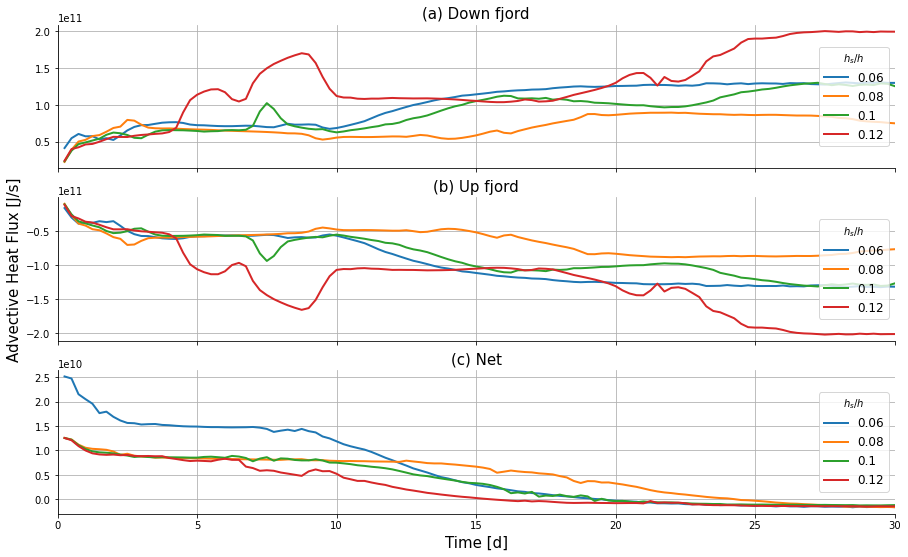

In [8]:
prof = np.array([1,2,3,4])
hsr = np.array([9, 12, 15, 18]) / 150
xi = 47
fig1 = plt.figure(figsize=(15,9))
fig1.tight_layout()

ax1 = fig1.add_subplot(311)
#ax1.axvline(x=4.8, color='k',lw=1.5,ls='--')
ax1.set_xlim([0, 30])
ax1.set_title(r'(a) Down fjord', loc='center', size=15)
#ax1.xaxis.set_visible(False)
#ax1.set_ylabel('Heat Flux [J/s]', size=15)
ax1.grid(True)
ax1.set_xticklabels([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)



ax2 = fig1.add_subplot(312)
ax2.set_xlim([0, 30])
ax2.set_title(r'(b) Up fjord', loc='center', size=15)
ax2.set_ylabel('Advective Heat Flux [J/s]', size=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3 = fig1.add_subplot(313)
ax3.set_xlim([0, 30])
ax3.set_title(r'(c) Net', loc='center', size=15)
ax3.set_xlabel('Time [d]', size=15)
#ax3.set_ylabel('Heat Flux [J/s]', size=15)
ax3.grid(True)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

for i in range(len(prof)):
    ot, advhp, advhn = heatflux_ts(prof[i],xi)
    
    ax1.plot(ot, advhp, lw=2, label=str(hsr[i]))
    ax1.legend(title=r'$h_s/h$', loc='right', fontsize=12)
    
    ax2.plot(ot, advhn, lw=2, label=str(hsr[i]))
    ax2.legend(title=r'$h_s/h$', loc='right', fontsize=12)
    
    ax3.plot(ot, advhp+advhn, lw=2, label=str(hsr[i]))
    ax3.legend(title=r'$h_s/h$', loc='right', fontsize=12)

print(Xp[xi])

In [ ]:
Xp[3], Xp[47], Xp[71]

In [9]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/FjordCirculation/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/hs_sill.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/AF_dis.png', dpi=200, bbox_inches='tight')